In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from network_model import *
from data import *
from Weather import Weather, to_weather

In [2]:
SIZE_OF_INPUT = 7
NUMBER_OF_NEURALS = 2

In [3]:
train_data = get_data("result2.csv")
train_data['Date'] = train_data['Date'].apply(pd.to_datetime, dayfirst=True)
train_data.tail(5)

,Station_Name,Date,Max_Temp,Min_Temp,Avg_Temp,Sum_Fall,Kind_of_Fall,Avg_Cloudiness,Avg_Wind_Speed,Avg_Humidity,Avg_Atmo_Pressure
74721,BIELSKO-BIA£A,2000-12-27,2.1,-3.1,-1.1,2.3,W,6.8,0.6,98.6,997.7
74722,BIELSKO-BIA£A,2000-12-28,2.4,-4.6,-0.1,9.5,S,8.0,2.1,95.1,994.4
74723,BIELSKO-BIA£A,2000-12-29,3.0,-0.5,0.8,0.0,S,7.9,2.3,93.9,1001.2
74724,BIELSKO-BIA£A,2000-12-30,1.8,-2.1,-0.6,10.8,S,8.0,3.1,98.8,998.8
74725,BIELSKO-BIA£A,2000-12-31,0.2,-2.8,-1.4,0.4,S,7.0,5.8,85.1,1012.5


In [4]:
gdansk_data = train_data.loc[train_data["Station_Name"]=="GDANSK"].sort_values(by='Date')
bielsko_data = train_data.sort_values(by='Date')
bielsko_data.tail(10)

,Station_Name,Date,Max_Temp,Min_Temp,Avg_Temp,Sum_Fall,Kind_of_Fall,Avg_Cloudiness,Avg_Wind_Speed,Avg_Humidity,Avg_Atmo_Pressure
74724,BIELSKO-BIA£A,2000-12-30,1.8,-2.1,-0.6,10.8,S,8.0,3.1,98.8,998.8
72897,WROC£AW,2000-12-30,0.2,-6.3,-1.4,2.6,S,7.0,2.3,95.5,1000.2
65589,GDANSK,2000-12-30,0.2,-5.1,-2.4,15.7,S,7.0,3.1,91.1,1000.8
69243,BIA£YSTOK,2000-12-30,0.7,-12.3,-2.6,2.0,S,7.6,3.0,94.5,1001.7
65590,GDANSK,2000-12-31,2.7,0.2,1.3,1.4,S,7.4,5.0,89.4,1002.3
69244,BIA£YSTOK,2000-12-31,0.9,-1.0,-0.1,2.6,S,8.0,3.5,95.8,1002.7
71071,WARSZAWA-OKÊCIE,2000-12-31,0.8,-1.9,-0.8,0.7,S,7.8,6.4,94.1,1006.2
72898,WROC£AW,2000-12-31,1.0,-2.1,-0.2,0.3,S,7.1,4.3,85.9,1011.3
67417,SZCZECIN,2000-12-31,0.8,-4.1,-0.8,0.0,S,7.0,3.0,91.5,1009.4
74725,BIELSKO-BIA£A,2000-12-31,0.2,-2.8,-1.4,0.4,S,7.0,5.8,85.1,1012.5


In [24]:
cities =  dict.fromkeys(train_data['Station_Name'].unique())
print(cities)
for city in cities:
    if city == "WARSZAWA":
        city_data = train_data.loc[train_data["Station_Name"]=="WARSZAWA" or ].sort_values(by='Date')
    city_data = train_data.loc[train_data["Station_Name"]==city].sort_values(by='Date')
    weather = to_weather(city_data)
    weather.standardize()

{'GDANSK': None, 'SZCZECIN': None, 'BIA£YSTOK': None, 'WARSZAWA': None, 'WROC£AW': None, 'BIELSKO-BIA£A': None, 'WARSZAWA-OKÊCIE': None}


In [5]:
weather = to_weather(gdansk_data)
weather.standardize()

x_train = np.concatenate((
    weather.temp_avg.reshape(-1, 1),
    weather.temp_min.reshape(-1, 1),
    weather.temp_max.reshape(-1, 1),
    weather.fall.reshape(-1, 1),
    weather.k_fall.reshape(-1, 1),
    weather.cloudiness.reshape(-1, 1),
    weather.wind_speed.reshape(-1, 1),
    weather.humidity.reshape(-1, 1),
    weather.pressure.reshape(-1, 1),
), axis=1)

y_train = x_train[1:, [0]]

network = NeuralNetwork(x_train[0:SIZE_OF_INPUT].T, y_train[0:SIZE_OF_INPUT], NUMBER_OF_NEURALS)

In [6]:
SIZE_OF_PLOT = len(x_train)-100
y_output = np.zeros(SIZE_OF_PLOT)
y_pred = np.zeros(SIZE_OF_PLOT)
for i in range(SIZE_OF_PLOT):
    network.train(x_train[i:i+SIZE_OF_INPUT].T, y_train[i+SIZE_OF_INPUT])
    y_output[i] = y_train[i+SIZE_OF_INPUT]
    y_pred[i] = network.output[0]

e:\Repository\Weather_Prediction\network_model.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


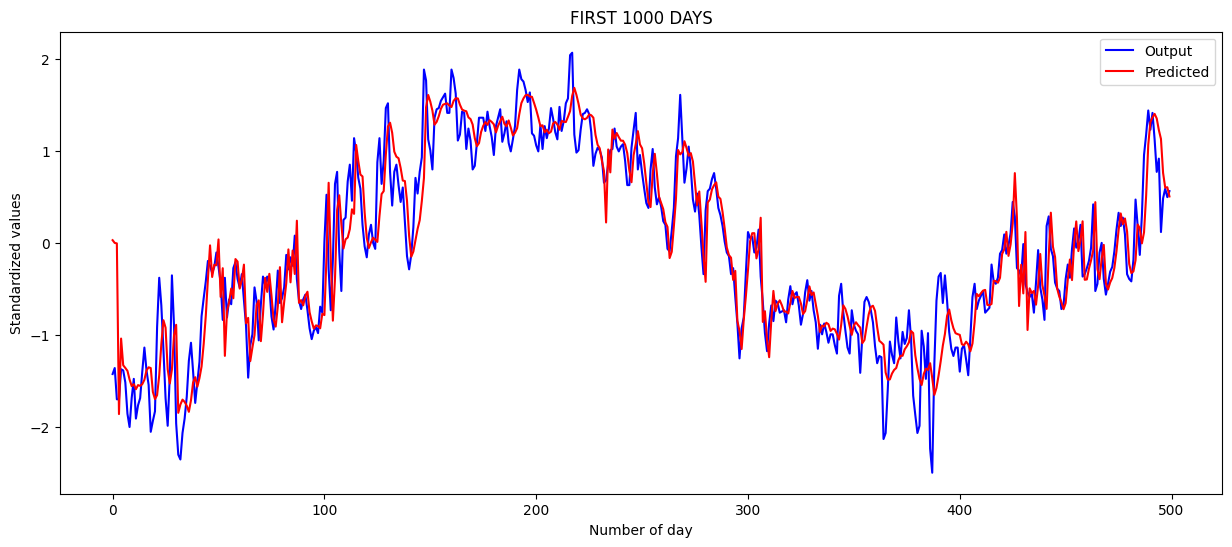

In [7]:
LENGHT = 500

plt.figure(figsize=(15,6))
plt.title("FIRST 1000 DAYS")
plt.xlabel("Number of day")
plt.ylabel("Standardized values")

x = np.arange(LENGHT)
plt.plot(x, y_output[:LENGHT], 'b', label="Output")
plt.plot(x, y_pred[:LENGHT], 'r', label="Predicted")
plt.legend()
plt.show()

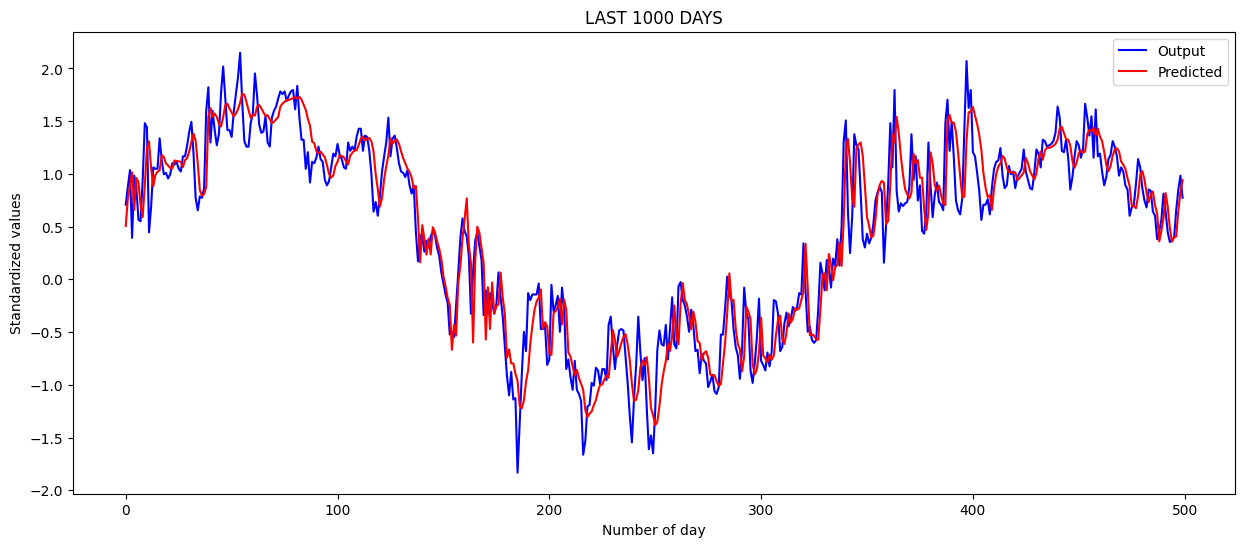

In [8]:
plt.figure(figsize=(15,6))
plt.title("LAST 1000 DAYS")
plt.xlabel("Number of day")
plt.ylabel("Standardized values")

x = np.arange(LENGHT)
plt.plot(x, y_output[-LENGHT:], 'b', label="Output")
plt.plot(x, y_pred[-LENGHT:], 'r', label="Predicted")
plt.legend()
plt.show()

In [9]:
print(f"MSE: {network.mse(y_output, y_pred)}")
print(f"MAE: {network.mae(y_output, y_pred)}")

MSE: 0.12365072992527018
MAE: 0.2604612534616499
